This script was made to visualize the pkl file from 1-extract.py. <br />
*Made by M. Pouya Mirzaei for the LaViolette Lab*

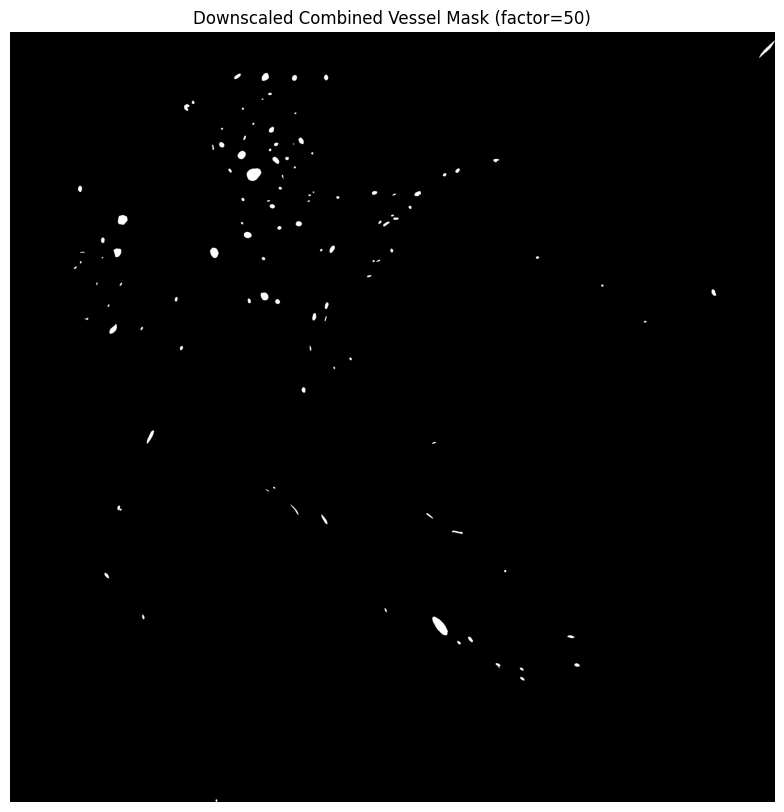

In [5]:
import pickle
import numpy as np
from skimage.draw import polygon
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load polygons
with open("data/vessel_masks.pkl", "rb") as f:
    polygons = pickle.load(f)

# Find image size (if not known)
all_points = [pt for poly in polygons for pt in poly]
max_y = int(max(pt[1] for pt in all_points)) + 1
max_x = int(max(pt[0] for pt in all_points)) + 1
mask_shape = (max_y, max_x)

# Make combined mask
combined_mask = np.zeros(mask_shape, dtype=np.uint8)
for poly in polygons:
    poly = np.array(poly)
    rr, cc = polygon(poly[:,1], poly[:,0], shape=mask_shape)
    combined_mask[rr, cc] = 1

# Downscale so RAM doesn't explode!
downscale_factor = 50
downscaled_mask = resize(
    combined_mask,
    (combined_mask.shape[0] // downscale_factor, combined_mask.shape[1] // downscale_factor),
    order=0,  # Nearest neighbor for binary mask
    preserve_range=True,
    anti_aliasing=False
).astype(bool) 

# Show the downscaled mask
plt.figure(figsize=(10, 10))  # Optional: makes plot window larger
plt.imshow(downscaled_mask, cmap='gray')
plt.title(f"Downscaled Combined Vessel Mask (factor={downscale_factor})")
plt.axis('off')
plt.show()

In [10]:
import pickle

with open("data/vessel_masks.pkl", "rb") as f:
    polygons = pickle.load(f)

print(f"Top-level is a list, length: {len(polygons)}")

Top-level is a list, length: 117
